In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
df=pd.read_csv('C:\\masters\\Master_projects\\research_lab\\Dataexploration3.csv')
df

,Article,Label,Source
0,"On Saturday, September 17 at 8:30 pm EST, an e...",True,Credibility
1,Less than a day after protests over the police...,True,Credibility
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...",True,Credibility
3,Getty Images Wealth Of Nations Trump vs. Clint...,True,Credibility
4,President Obama today vetoed a bill that would...,True,Credibility
...,...,...,...
3895,Lonely kid befriends fantasy creature. Grownup...,unlabel,Site-Kaggle Article
3896,The sexual assault scandal that led to removal...,unlabel,Site-Kaggle Article
3897,It was the lack of anger that made this partic...,unlabel,Site-Kaggle Article
3898,“I want to win this election on my policies fo...,unlabel,Site-Kaggle Article


In [2]:
df.groupby(['Label','Source']).size()

Label    Source             
False    Credibility             209
         fakenewsnet             490
True     Credibility             211
         fakenewsnet             490
unlabel  Site-Kaggle Article    2500
dtype: int64

In [3]:
import random
import matplotlib.pyplot as plt

def draw_barchart(df, target,title,ylabel):
    # Prepare Data
    title=title
    ylabel=ylabel
    df = df.groupby(target).size().reset_index(name='counts')
    df = df.sort_values(by=['counts'], ascending = False)
    n = df[target].unique().__len__()+1
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(100)
    c = random.choices(all_colors, k=n)

    # Plot Bars
    
    plt.figure(figsize=(10,5), dpi= 80)
    plt.bar(df[target], df['counts'], color=c, width=.5)
    for i, val in enumerate(df['counts'].values):
        plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

    # Decoration
    plt.gca().set_xticklabels(df[target], rotation=60, horizontalalignment= 'right')
    plt.title(title, fontsize=22)
    plt.ylabel(ylabel)
#     plt.ylim(0, 45)
    plt.show()

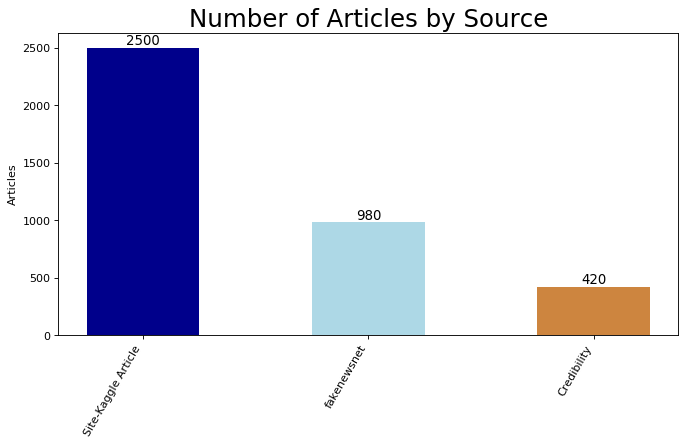

In [4]:
draw_barchart(df,'Source','Number of Articles by Source','Articles')

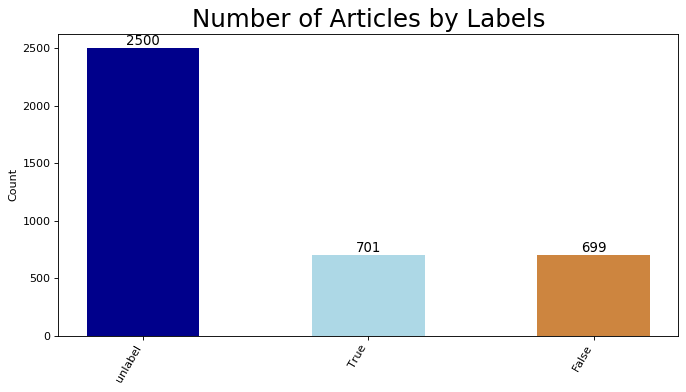

In [6]:
draw_barchart(df,'Label','Number of Articles by Labels','Count')

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot(dataframe,xlabel,x_sub_label,xlab,ylab,title,xdim=10,ydim=5):
    df=dataframe
    df['Count_words'] = df['Article'].str.split().str.len()
    fig_dims = (xdim, ydim)
    fig, ax = plt.subplots(figsize=fig_dims)
    _ = sns.boxplot(x=xlabel, y='Count_words', hue=x_sub_label,data=df)
    # Label the axes
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()


C:\Users\chidi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


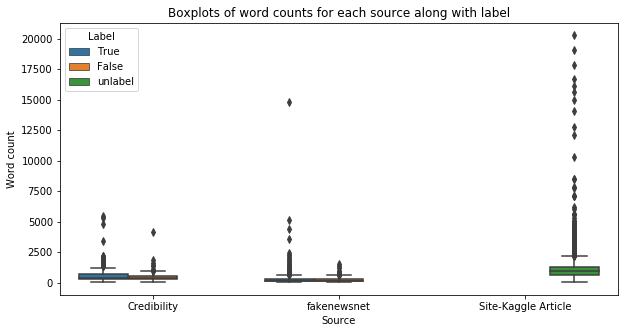

In [8]:
box_plot(df,'Source','Label','Source','Word count','Boxplots of word counts for each source along with label',10,5)

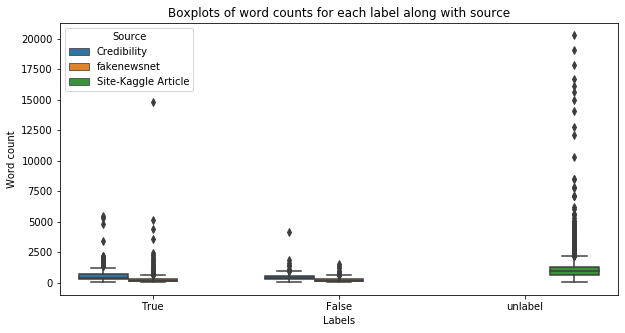

In [9]:
box_plot(df,'Label','Source','Labels','Word count','Boxplots of word counts for each label along with source',10,5)

In [10]:
def box_plot_per(dataframe,xlabel,xlab,ylab,title,xdim=10,ydim=5):
    df=dataframe
    df['Count_words'] = df['Article'].str.split().str.len()
    fig_dims = (xdim, ydim)
    fig, ax = plt.subplots(figsize=fig_dims)
    _ = sns.boxplot(x=xlabel, y='Count_words',data=df)
    # Label the axes
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()


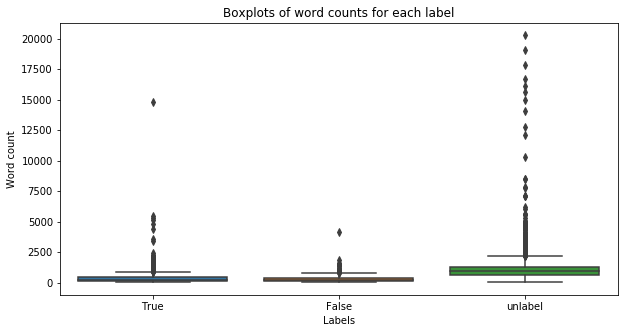

In [11]:
box_plot_per(df,'Label','Labels','Word count','Boxplots of word counts for each label',10,5)

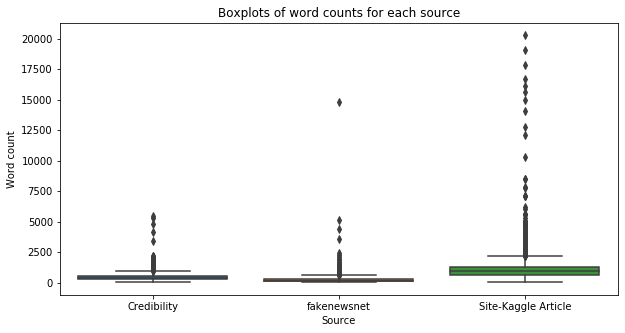

In [12]:
box_plot_per(df,'Source','Source','Word count','Boxplots of word counts for each source',10,5)

In [13]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
def distribution_plot(dataframe,xlab,ylab,title):
    df=dataframe
    df['Count_words'] = df['Article'].str.split().str.len()
# matplotlib histogram
    plt.hist(df['Count_words'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
    sns.distplot(df['Count_words'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)    

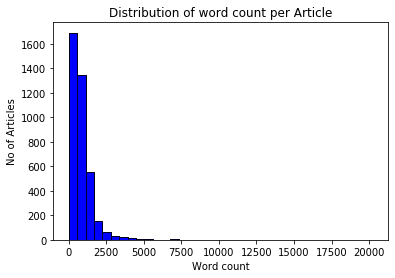

In [14]:
distribution_plot(df,'Word count','No of Articles','Distribution of word count per Article')

In [19]:
# Make a separate list for each airline
def distribution_plot_source(dataframe,xlab,ylab,title):
    df=dataframe
    df['Count_words'] = df['Article'].str.split().str.len()
    x1 = list(df[df['Source'] == 'Credibility']['Count_words'])
    x2 = list(df[df['Source'] == 'Site-Kaggle Article']['Count_words'])
    x3 = list(df[df['Source'] == 'fakenewsnet']['Count_words'])
    #x4 = list(df[df['Source'] == 'Paper-Bert']['Count_words'])

    
# Assign colors for each airline and the names
    colors = ['#E69F00', '#56B4E9', '#F0E442']
    names = ['Credibility', 'Site-Kaggle Article', 'fakenewsnet']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
    plt.xlim(10, 5000)
    plt.hist([x1, x2, x3], bins = int(180/15), normed=False,
         color = colors, label=names)

# Plot formatting
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.savefig('C:\\masters\\Master_projects\\research_lab\\dataset3.png')

C:\Users\chidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


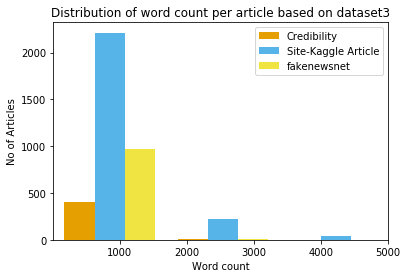

In [20]:
distribution_plot_source(df,'Word count','No of Articles','Distribution of word count per article based on dataset3')

In [28]:
def distribution_plot_label(dataframe,xlab,ylab,title):
    df=dataframe
    
# Make a separate list for each airline
    df['Count_words'] = df['Article'].str.split().str.len()
    x1 = list(df[df['Label'] == 'True']['Count_words'])
    x2 = list(df[df['Label'] == 'unlabel']['Count_words'])
    x3 = list(df[df['Label'] == 'False']['Count_words'])


# Assign colors for each airline and the names
    colors = ['#E69F00', '#56B4E9', '#F0E442']
    names = ['True','unlabel','False']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
    plt.xlim(10, 5000)
    plt.hist([x1, x2, x3], bins = int(180/15), normed=False,
         color = colors, label=names)

# Plot formatting
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.savefig('C:\\masters\\Master_projects\\research_lab\\dataset3_labels.png')

C:\Users\chidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


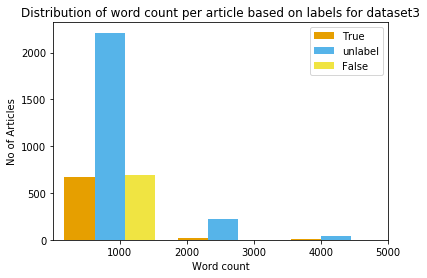

In [29]:
distribution_plot_label(df,'Word count','No of Articles','Distribution of word count per article based on labels for dataset3')  

In [23]:
def draw_barchart_words(df, target,title,ylabel):
    # Prepare Data
    title=title
    ylabel=ylabel
    df['Count_words'] = df['Article'].str.split().str.len()
    df=df.groupby([target])['Count_words'].sum().reset_index()
    df = df.sort_values(by=['Count_words'], ascending = False)
    n = df[target].unique().__len__()+1
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(100)
    c = random.choices(all_colors, k=n)

    # Plot Bars
    
    plt.figure(figsize=(10,5), dpi= 80)
    plt.bar(df[target], df['Count_words'], color=c, width=.5)
    for i, val in enumerate(df['Count_words'].values):
        plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

    # Decoration
    plt.gca().set_xticklabels(df[target], rotation=60, horizontalalignment= 'right')
    plt.title(title, fontsize=22)
    plt.ylabel(ylabel)
#     plt.ylim(0, 45)
    plt.show()

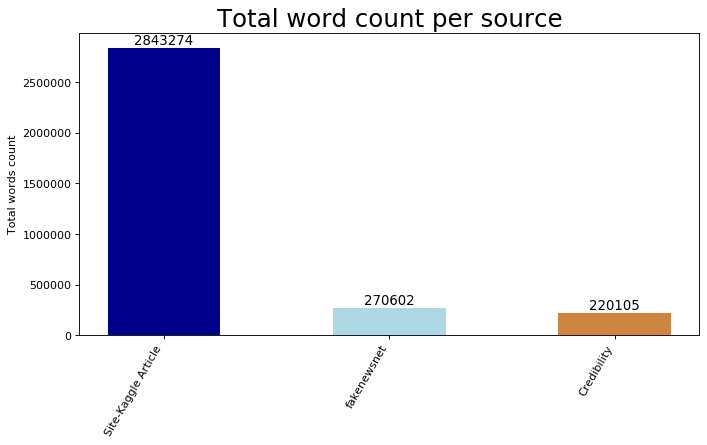

In [24]:
draw_barchart_words(df, 'Source','Total word count per source','Total words count')

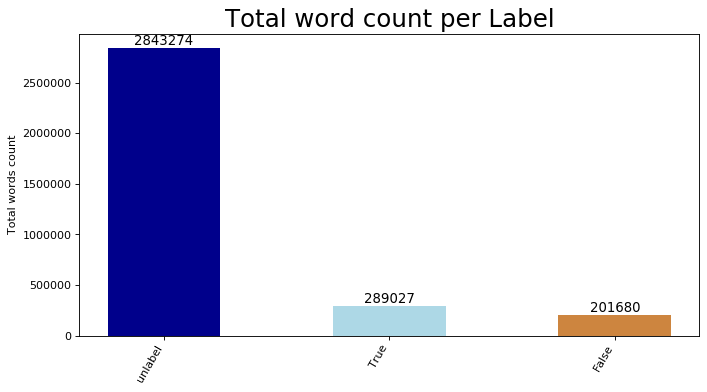

In [25]:
draw_barchart_words(df, 'Label','Total word count per Label','Total words count')